## 확률적 경사 하강법

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [4]:
fish_input = fish[fish.columns[1:]].to_numpy()
fish_target = fish['Species'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target)

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
from sklearn.linear_model import SGDClassifier

In [8]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.6974789915966386
0.8


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [9]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8235294117647058
0.8


In [11]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [12]:
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled, test_target))

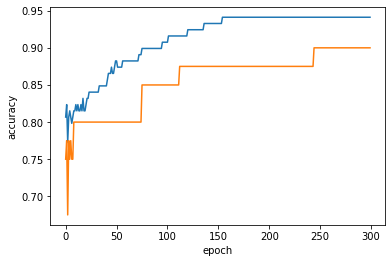

In [15]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [16]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.865546218487395
0.925


In [17]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9327731092436975
0.95


## 마무리
- 확률적 경사 하강법 
  - 훈련 세트에서 샘플을 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘. 
  - 샘플을 하나씩 사용하지 않고 여러 개를 사용하면 미니배치 경사 하강법이 된다. 
  - 한 번에 전체 샘플을 사용하면 배치 경사 하강법이 된다.
- 손실 함수
  - 확률적 경사 하강법이 최적화할 대상
  - 이진 분류에는 로지스틱 회귀(또는 이진 크로스엔트로피) 손실 함수를 사용
  - 다중 분류에는 크로스엔트로피 손실 함수를 사용
  - 회귀 문제에는 평균 제곱 오차 손실 함수를 사용
- 에포크: 확률적 경사 하강법에서 전체 샘플을 모두 사용하는 한 번 반복을 의미
- scikit-learn
  - SGDClassifier
    - 확률적 경사 하강법을 사용한 분류 모델을 만든다
    - loss 매개변수는 확률적 경사 하강법으로 최적화할 손실 함수를 지정한다. 기본값은 서포트벡터 머신을 위한 'hinge'손실 함수이다. 로지스틱 회귀를 위해서는 'log'로 지정한다.
    - penalty 매개변수에서 규제의 종류를 지정할 수 있다. 기본값은 L2 규제를 위한 'l2'이다. L1 규제를 적용하려면 'l1'로 지정한다.
    - alpha 매개변수에서 규제의 강도를 지정한다. 기본값은 0.0001이다.
    - max_iter 매개변수는 에포크 횟수를 지정한다. 기본값은 1000이다.
    - tol 매개변수는 반복을 멈출 조건이다. n_iter_no_change 매개변수에서 지정한 에포크 동안 손실이 tol만큼 줄어들지 않으면 알고리즘이 중단된다. tol 매개변수의 기본값은 0.001이고 n_iter_no_change 매개변수의 기본값은 5이다.
  - SGDRegressor
    - 확률적 경사 하강법을 사용한 회귀 모델을 만든다
    - loss 매개변수에서 손실 함수를 지정한다. 기본값은 제곱 오차를 나타내는 'squared_loss'이다.
    - SGDClassifier의 매개변수를 동일하게 사용한다.